In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

2025-04-04 09:10:41.320695: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.h5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 10

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout (Dropout)               │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,180 (4.61 KB)

 Trainable params: 1,180 (4.61 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 29s 805ms/step - accuracy: 0.1172 - loss: 2.3611
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1543 - loss: 2.2867 - val_accuracy: 0.2815 - val_loss: 2.0917
Epoch 2/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.2734 - loss: 2.0484
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2716 - loss: 2.1054 - val_accuracy: 0.3390 - val_loss: 1.9615
Epoch 3/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.2891 - loss: 2.0265
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3005 - loss: 2.0055 - val_accuracy: 0.3523 - val_loss: 1.8578
Epoch 4/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.2969 - loss: 1.9096
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3266 - loss: 1.9012 - val_accuracy: 0.3960 - val_loss: 1.7445
Epoch 5/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.3750 - loss: 1.7441
Epoch 5: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3373 - loss: 1.8106 - val_accuracy: 0.4307 - val_loss: 1.6511
Epoch 6/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.3672 - loss: 1.7926
Epoch 6: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3600 - loss: 1.7474 - val_accuracy: 0.4940 - val_loss: 1.5799
Epoch 7/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.3672 - loss: 1.7891
Epoch 7: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3747 - loss: 1.7083 - val_accuracy: 0.5294 - val_loss: 1.5128
Epoch 8/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.4062 - loss: 1.6405
Epoch 8: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3997 - loss: 1.6462 - val_accuracy: 0.5914 - val_loss: 1.4495
Epoch 9/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.3984 - loss: 1.6355
Epoch 9: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4121 - loss: 1.6269 - val_accuracy: 0.6148 - val_loss: 1.3917
Epoch 10/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.3906 - loss: 1.6017
Epoch 10: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4274 - loss: 1.5783 - val_accuracy: 0.6230 - val_loss: 1.3448
Epoch 11/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.4062 - loss: 1.6806
Epoch 11: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4427 - loss: 1.5422 - val_accuracy: 0.6395 - val_loss: 1.2906
Epoch 12/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.3828 - loss: 1.5739
Epoch 12: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4394 - loss: 1.5088 - val_accuracy: 0.6490 - val_loss: 1.2456
Epoch 13/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.4375 - loss: 1.5168
Epoch 13: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4626 - loss: 1.4681 - val_accuracy: 0.6755 - val_loss: 1.1967
Epoch 14/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.4219 - loss: 1.5173
Epoch 14: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4623 - loss: 1.4601 - val_accuracy: 0.6654 - val_loss: 1.1551
Epoch 15/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - accuracy: 0.5234 - loss: 1.3357
Epoch 15: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4932 - loss: 1.3865 - val_accuracy: 0.7533 - val_loss: 1.1214
Epoch 16/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.5547 - loss: 1.3709
Epoch 16: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5175 - loss: 1.3573 - val_accuracy: 0.7552 - val_loss: 1.0769
Epoch 17/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.5547 - loss: 1.3509
Epoch 17: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5177 - loss: 1.3660 - val_accuracy: 0.7394 - val_loss: 1.0506
Epoch 18/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.5391 - loss: 1.2801
Epoch 18: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5131 - loss: 1.3354 - val_accuracy: 0.7584 - val_loss: 1.0045
Epoch 19/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step - accuracy: 0.5391 - loss: 1.3111
Epoch 19: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5254 - loss: 1.2989 - val_accuracy: 0.7603 - val_loss: 0.9806
Epoch 20/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.5234 - loss: 1.2683
Epoch 20: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5293 - loss: 1.2735 - val_accuracy: 0.7641 - val_loss: 0.9561
Epoch 21/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - accuracy: 0.6016 - loss: 1.0976
Epoch 21: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5361 - loss: 1.2570 - val_accuracy: 0.7691 - val_loss: 0.9348
Epoch 22/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.5391 - loss: 1.3198
Epoch 22: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5491 - loss: 1.2532 - val_accuracy: 0.7660 - val_loss: 0.9107
Epoch 23/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.5391 - loss: 1.1881
Epoch 23: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5430 - loss: 1.2184 - val_accuracy: 0.7685 - val_loss: 0.8858
Epoch 24/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.5781 - loss: 1.1709
Epoch 24: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5495 - loss: 1.2170 - val_accuracy: 0.7679 - val_loss: 0.8732
Epoch 25/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.5391 - loss: 1.2352
Epoch 25: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5509 - loss: 1.2231 - val_accuracy: 0.7723 - val_loss: 0.8518
Epoch 26/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.6016 - loss: 1.1112
Epoch 26: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5721 - loss: 1.1768 - val_accuracy: 0.7805 - val_loss: 0.8367
Epoch 27/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.5625 - loss: 1.2461
Epoch 27: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5591 - loss: 1.1754 - val_accuracy: 0.7805 - val_loss: 0.8128
Epoch 28/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - accuracy: 0.6250 - loss: 1.0128
Epoch 28: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5825 - loss: 1.1368 - val_accuracy: 0.7862 - val_loss: 0.8042
Epoch 29/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - accuracy: 0.6094 - loss: 1.0533
Epoch 29: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5764 - loss: 1.1442 - val_accuracy: 0.7843 - val_loss: 0.7940
Epoch 30/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.5781 - loss: 1.2225
Epoch 30: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5872 - loss: 1.1492 - val_accuracy: 0.7843 - val_loss: 0.7785
Epoch 31/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.5469 - loss: 1.2496
Epoch 31: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5707 - loss: 1.1857 - val_accuracy: 0.7887 - val_loss: 0.7638
Epoch 32/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.5312 - loss: 1.2260
Epoch 32: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5734 - loss: 1.1458 - val_accuracy: 0.7913 - val_loss: 0.7517
Epoch 33/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.6172 - loss: 1.0709
Epoch 33: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5883 - loss: 1.1269 - val_accuracy: 0.7944 - val_loss: 0.7423
Epoch 34/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.5781 - loss: 1.0576
Epoch 34: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5899 - loss: 1.1067 - val_accuracy: 0.7951 - val_loss: 0.7378
Epoch 35/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.6328 - loss: 1.0100
Epoch 35: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6015 - loss: 1.0957 - val_accuracy: 0.7951 - val_loss: 0.7309
Epoch 36/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.6172 - loss: 1.0177
Epoch 36: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6027 - loss: 1.0941 - val_accuracy: 0.8216 - val_loss: 0.7160
Epoch 37/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.6094 - loss: 1.0889
Epoch 37: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5941 - loss: 1.1110 - val_accuracy: 0.8159 - val_loss: 0.7053
Epoch 38/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.6719 - loss: 1.0698
Epoch 38: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6210 - loss: 1.0583 - val_accuracy: 0.8077 - val_loss: 0.6974
Epoch 39/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - accuracy: 0.5703 - loss: 1.1133
Epoch 39: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5999 - loss: 1.0938 - val_accuracy: 0.8248 - val_loss: 0.6839
Epoch 40/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.5859 - loss: 1.1268
Epoch 40: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6040 - loss: 1.0812 - val_accuracy: 0.8362 - val_loss: 0.6782
Epoch 41/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.6094 - loss: 1.0704
Epoch 41: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6024 - loss: 1.0799 - val_accuracy: 0.8336 - val_loss: 0.6708
Epoch 42/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - accuracy: 0.5781 - loss: 1.0588
Epoch 42: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6119 - loss: 1.0367 - val_accuracy: 0.8343 - val_loss: 0.6561
Epoch 43/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.5859 - loss: 1.1457
Epoch 43: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6094 - loss: 1.0710 - val_accuracy: 0.8330 - val_loss: 0.6542
Epoch 44/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.6484 - loss: 1.0297
Epoch 44: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6205 - loss: 1.0505 - val_accuracy: 0.8368 - val_loss: 0.6631
Epoch 45/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.6328 - loss: 0.9458
Epoch 45: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6237 - loss: 1.0222 - val_accuracy: 0.8368 - val_loss: 0.6475
Epoch 46/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - accuracy: 0.6797 - loss: 0.9103
Epoch 46: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6290 - loss: 1.0144 - val_accuracy: 0.8362 - val_loss: 0.6356
Epoch 47/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.6172 - loss: 1.0420
Epoch 47: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6324 - loss: 1.0218 - val_accuracy: 0.8368 - val_loss: 0.6212
Epoch 48/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.6172 - loss: 1.1126
Epoch 48: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6178 - loss: 1.0431 - val_accuracy: 0.8393 - val_loss: 0.6297
Epoch 49/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.7031 - loss: 0.9366
Epoch 49: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6465 - loss: 1.0071 - val_accuracy: 0.8450 - val_loss: 0.6219
Epoch 50/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - accuracy: 0.6641 - loss: 1.0036
Epoch 50: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6360 - loss: 1.0132 - val_accuracy: 0.8438 - val_loss: 0.6311
Epoch 51/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - accuracy: 0.6250 - loss: 0.9828
Epoch 51: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6350 - loss: 1.0204 - val_accuracy: 0.8450 - val_loss: 0.6169
Epoch 52/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.6172 - loss: 1.0039
Epoch 52: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6303 - loss: 1.0142 - val_accuracy: 0.8539 - val_loss: 0.6053
Epoch 53/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.6641 - loss: 1.0124
Epoch 53: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6479 - loss: 0.9783 - val_accuracy: 0.8488 - val_loss: 0.6036
Epoch 54/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - accuracy: 0.7109 - loss: 0.8711
Epoch 54: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6616 - loss: 0.9649 - val_accuracy: 0.8501 - val_loss: 0.5900
Epoch 55/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - accuracy: 0.5547 - loss: 1.0112
Epoch 55: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6286 - loss: 0.9966 - val_accuracy: 0.8495 - val_loss: 0.5862
Epoch 56/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.6406 - loss: 0.9541
Epoch 56: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6470 - loss: 0.9792 - val_accuracy: 0.8520 - val_loss: 0.5836
Epoch 57/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.6641 - loss: 0.9915
Epoch 57: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6418 - loss: 0.9821 - val_accuracy: 0.8476 - val_loss: 0.5824
Epoch 58/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - accuracy: 0.5938 - loss: 1.0705
Epoch 58: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6314 - loss: 1.0103 - val_accuracy: 0.8495 - val_loss: 0.5784
Epoch 59/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.6328 - loss: 1.0775
Epoch 59: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6316 - loss: 0.9963 - val_accuracy: 0.8526 - val_loss: 0.5744
Epoch 60/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.6953 - loss: 0.8045
Epoch 60: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6325 - loss: 0.9833 - val_accuracy: 0.8507 - val_loss: 0.5761
Epoch 61/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.6875 - loss: 0.9395
Epoch 61: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6636 - loss: 0.9643 - val_accuracy: 0.8533 - val_loss: 0.5756
Epoch 62/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.6328 - loss: 0.9610
Epoch 62: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6534 - loss: 0.9551 - val_accuracy: 0.8533 - val_loss: 0.5654
Epoch 63/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - accuracy: 0.6250 - loss: 1.0412
Epoch 63: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6467 - loss: 0.9710 - val_accuracy: 0.8482 - val_loss: 0.5651
Epoch 64/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.6797 - loss: 0.8784
Epoch 64: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6596 - loss: 0.9446 - val_accuracy: 0.8596 - val_loss: 0.5593
Epoch 65/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.6094 - loss: 0.9837
Epoch 65: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6523 - loss: 0.9642 - val_accuracy: 0.8608 - val_loss: 0.5505
Epoch 66/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.6797 - loss: 0.8807
Epoch 66: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6445 - loss: 0.9876 - val_accuracy: 0.8583 - val_loss: 0.5530
Epoch 67/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.6562 - loss: 1.0144
Epoch 67: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6385 - loss: 0.9919 - val_accuracy: 0.8615 - val_loss: 0.5468
Epoch 68/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.6484 - loss: 1.0476
Epoch 68: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6469 - loss: 1.0013 - val_accuracy: 0.8602 - val_loss: 0.5444
Epoch 69/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.6562 - loss: 0.9685
Epoch 69: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6521 - loss: 0.9698 - val_accuracy: 0.8583 - val_loss: 0.5500
Epoch 70/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.7031 - loss: 0.8265
Epoch 70: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6422 - loss: 0.9531 - val_accuracy: 0.8552 - val_loss: 0.5457
Epoch 71/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.6875 - loss: 0.8964
Epoch 71: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6656 - loss: 0.9331 - val_accuracy: 0.8646 - val_loss: 0.5337
Epoch 72/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.7344 - loss: 0.7706
Epoch 72: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6567 - loss: 0.9602 - val_accuracy: 0.8627 - val_loss: 0.5366
Epoch 73/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.7031 - loss: 0.8316
Epoch 73: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6627 - loss: 0.9362 - val_accuracy: 0.8571 - val_loss: 0.5387
Epoch 74/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.7188 - loss: 0.8848
Epoch 74: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6597 - loss: 0.9550 - val_accuracy: 0.8615 - val_loss: 0.5261
Epoch 75/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 118ms/step - accuracy: 0.6641 - loss: 0.9282
Epoch 75: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6459 - loss: 0.9538 - val_accuracy: 0.8558 - val_loss: 0.5335
Epoch 76/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.6641 - loss: 0.9133
Epoch 76: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6743 - loss: 0.9328 - val_accuracy: 0.8646 - val_loss: 0.5185
Epoch 77/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 120ms/step - accuracy: 0.7031 - loss: 0.8838
Epoch 77: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6603 - loss: 0.9290 - val_accuracy: 0.8659 - val_loss: 0.5177
Epoch 78/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.7344 - loss: 0.8519
Epoch 78: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6718 - loss: 0.9386 - val_accuracy: 0.8646 - val_loss: 0.5156
Epoch 79/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - accuracy: 0.7188 - loss: 0.8473
Epoch 79: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6690 - loss: 0.9376 - val_accuracy: 0.8545 - val_loss: 0.5247
Epoch 80/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - accuracy: 0.7031 - loss: 1.0063
Epoch 80: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6642 - loss: 0.9646 - val_accuracy: 0.8596 - val_loss: 0.5138
Epoch 81/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - accuracy: 0.5547 - loss: 1.2277
Epoch 81: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6583 - loss: 0.9429 - val_accuracy: 0.8646 - val_loss: 0.5095
Epoch 82/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.6641 - loss: 0.9072
Epoch 82: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6707 - loss: 0.9103 - val_accuracy: 0.8634 - val_loss: 0.5070
Epoch 83/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.7188 - loss: 0.9200
Epoch 83: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6706 - loss: 0.9150 - val_accuracy: 0.8608 - val_loss: 0.5057
Epoch 84/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.6562 - loss: 0.9436
Epoch 84: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6719 - loss: 0.9290 - val_accuracy: 0.8665 - val_loss: 0.4945
Epoch 85/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.7266 - loss: 0.8101
Epoch 85: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6685 - loss: 0.9134 - val_accuracy: 0.8684 - val_loss: 0.4969
Epoch 86/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.6641 - loss: 0.8400
Epoch 86: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6797 - loss: 0.8833 - val_accuracy: 0.8710 - val_loss: 0.4894
Epoch 87/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.6953 - loss: 0.8919
Epoch 87: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6817 - loss: 0.8980 - val_accuracy: 0.8653 - val_loss: 0.4926
Epoch 88/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.6094 - loss: 1.0225
Epoch 88: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6640 - loss: 0.9249 - val_accuracy: 0.8640 - val_loss: 0.4867
Epoch 89/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - accuracy: 0.6562 - loss: 0.8864
Epoch 89: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6665 - loss: 0.9019 - val_accuracy: 0.8678 - val_loss: 0.4871
Epoch 90/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step - accuracy: 0.6250 - loss: 0.9545
Epoch 90: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6643 - loss: 0.9143 - val_accuracy: 0.8678 - val_loss: 0.4918
Epoch 91/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.6719 - loss: 0.9582
Epoch 91: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6735 - loss: 0.9262 - val_accuracy: 0.8710 - val_loss: 0.4872
Epoch 92/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.6719 - loss: 0.8438
Epoch 92: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6818 - loss: 0.8780 - val_accuracy: 0.8672 - val_loss: 0.4866
Epoch 93/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.6797 - loss: 0.8906
Epoch 93: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6757 - loss: 0.9006 - val_accuracy: 0.8691 - val_loss: 0.4787
Epoch 94/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.7422 - loss: 0.8059
Epoch 94: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6813 - loss: 0.8899 - val_accuracy: 0.8678 - val_loss: 0.4815
Epoch 95/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step - accuracy: 0.6562 - loss: 0.8879
Epoch 95: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6711 - loss: 0.9077 - val_accuracy: 0.8760 - val_loss: 0.4770
Epoch 96/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.7344 - loss: 0.7226
Epoch 96: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6791 - loss: 0.8842 - val_accuracy: 0.8716 - val_loss: 0.4863
Epoch 97/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.6641 - loss: 0.9376
Epoch 97: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6811 - loss: 0.8890 - val_accuracy: 0.8703 - val_loss: 0.4696
Epoch 98/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - accuracy: 0.6406 - loss: 1.0089
Epoch 98: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6709 - loss: 0.9130 - val_accuracy: 0.8754 - val_loss: 0.4746
Epoch 99/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.6875 - loss: 0.8521
Epoch 99: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6598 - loss: 0.9043 - val_accuracy: 0.8716 - val_loss: 0.4633
Epoch 100/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.6875 - loss: 0.8739
Epoch 100: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6818 - loss: 0.8861 - val_accuracy: 0.8735 - val_loss: 0.4617
Epoch 101/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.6875 - loss: 0.8449
Epoch 101: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6865 - loss: 0.8794 - val_accuracy: 0.8697 - val_loss: 0.4735
Epoch 102/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 119ms/step - accuracy: 0.7188 - loss: 0.7697
Epoch 102: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6798 - loss: 0.8836 - val_accuracy: 0.8748 - val_loss: 0.4614
Epoch 103/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - accuracy: 0.7422 - loss: 0.8057
Epoch 103: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6719 - loss: 0.9000 - val_accuracy: 0.8760 - val_loss: 0.4723
Epoch 104/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - accuracy: 0.6797 - loss: 0.9037
Epoch 104: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6734 - loss: 0.8904 - val_accuracy: 0.8748 - val_loss: 0.4699
Epoch 105/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - accuracy: 0.6719 - loss: 0.8241
Epoch 105: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6773 - loss: 0.8869 - val_accuracy: 0.8874 - val_loss: 0.4635
Epoch 106/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.6953 - loss: 0.8753
Epoch 106: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6869 - loss: 0.8604 - val_accuracy: 0.8811 - val_loss: 0.4628
Epoch 107/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - accuracy: 0.6406 - loss: 0.9265
Epoch 107: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6746 - loss: 0.8942 - val_accuracy: 0.8855 - val_loss: 0.4570
Epoch 108/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.6953 - loss: 0.7728
Epoch 108: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6734 - loss: 0.8841 - val_accuracy: 0.8779 - val_loss: 0.4522
Epoch 109/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.7109 - loss: 0.7876
Epoch 109: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6826 - loss: 0.8729 - val_accuracy: 0.8779 - val_loss: 0.4493
Epoch 110/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.6875 - loss: 0.9534
Epoch 110: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6741 - loss: 0.9102 - val_accuracy: 0.8798 - val_loss: 0.4581
Epoch 111/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 125ms/step - accuracy: 0.6641 - loss: 0.9023
Epoch 111: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6926 - loss: 0.8611 - val_accuracy: 0.8906 - val_loss: 0.4487
Epoch 112/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.7344 - loss: 0.7888
Epoch 112: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6873 - loss: 0.8485 - val_accuracy: 0.8830 - val_loss: 0.4456
Epoch 113/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - accuracy: 0.6094 - loss: 0.9179
Epoch 113: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6654 - loss: 0.8907 - val_accuracy: 0.8874 - val_loss: 0.4463
Epoch 114/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.7344 - loss: 0.8175
Epoch 114: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6768 - loss: 0.8778 - val_accuracy: 0.8912 - val_loss: 0.4432
Epoch 115/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.7031 - loss: 0.8784
Epoch 115: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6957 - loss: 0.8494 - val_accuracy: 0.8944 - val_loss: 0.4399
Epoch 116/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.7188 - loss: 0.7079
Epoch 116: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6864 - loss: 0.8494 - val_accuracy: 0.9020 - val_loss: 0.4393
Epoch 117/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - accuracy: 0.6797 - loss: 0.8934
Epoch 117: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6960 - loss: 0.8532 - val_accuracy: 0.8906 - val_loss: 0.4453
Epoch 118/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.6484 - loss: 0.8073
Epoch 118: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6759 - loss: 0.8794 - val_accuracy: 0.8925 - val_loss: 0.4324
Epoch 119/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.6953 - loss: 0.8611
Epoch 119: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6773 - loss: 0.9033 - val_accuracy: 0.8982 - val_loss: 0.4361
Epoch 120/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.6484 - loss: 0.9560
Epoch 120: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6824 - loss: 0.8685 - val_accuracy: 0.8931 - val_loss: 0.4289
Epoch 121/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 118ms/step - accuracy: 0.7031 - loss: 0.8552
Epoch 121: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6959 - loss: 0.8467 - val_accuracy: 0.9070 - val_loss: 0.4326
Epoch 122/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.6562 - loss: 0.8368
Epoch 122: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6733 - loss: 0.8805 - val_accuracy: 0.9020 - val_loss: 0.4388
Epoch 123/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.7422 - loss: 0.7692
Epoch 123: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7073 - loss: 0.8307 - val_accuracy: 0.8931 - val_loss: 0.4322
Epoch 124/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.7266 - loss: 0.7955
Epoch 124: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6981 - loss: 0.8438 - val_accuracy: 0.9020 - val_loss: 0.4268
Epoch 125/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 120ms/step - accuracy: 0.7422 - loss: 0.8249
Epoch 125: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6992 - loss: 0.8497 - val_accuracy: 0.8937 - val_loss: 0.4300
Epoch 126/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - accuracy: 0.6875 - loss: 0.7694
Epoch 126: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6813 - loss: 0.8574 - val_accuracy: 0.9089 - val_loss: 0.4206
Epoch 127/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.7266 - loss: 0.7162
Epoch 127: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6876 - loss: 0.8458 - val_accuracy: 0.9020 - val_loss: 0.4194
Epoch 128/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.6875 - loss: 0.7897
Epoch 128: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6889 - loss: 0.8599 - val_accuracy: 0.9045 - val_loss: 0.4284
Epoch 129/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.7734 - loss: 0.7895
Epoch 129: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6964 - loss: 0.8608 - val_accuracy: 0.9077 - val_loss: 0.4198
Epoch 130/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.7109 - loss: 0.8360
Epoch 130: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6896 - loss: 0.8267 - val_accuracy: 0.9051 - val_loss: 0.4097
Epoch 131/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.6953 - loss: 0.8113
Epoch 131: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6905 - loss: 0.8350 - val_accuracy: 0.9051 - val_loss: 0.4205
Epoch 132/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 115ms/step - accuracy: 0.6641 - loss: 0.8458
Epoch 132: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6922 - loss: 0.8412 - val_accuracy: 0.9058 - val_loss: 0.4127
Epoch 133/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.6562 - loss: 0.8613
Epoch 133: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6802 - loss: 0.8659 - val_accuracy: 0.9077 - val_loss: 0.4146
Epoch 134/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.7031 - loss: 0.8393
Epoch 134: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6992 - loss: 0.8354 - val_accuracy: 0.9051 - val_loss: 0.4111
Epoch 135/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - accuracy: 0.6953 - loss: 0.7973
Epoch 135: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6977 - loss: 0.8392 - val_accuracy: 0.9102 - val_loss: 0.4053
Epoch 136/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.7266 - loss: 0.7728
Epoch 136: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6859 - loss: 0.8559 - val_accuracy: 0.9121 - val_loss: 0.4119
Epoch 137/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - accuracy: 0.7344 - loss: 0.7450
Epoch 137: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7152 - loss: 0.7904 - val_accuracy: 0.9045 - val_loss: 0.4045
Epoch 138/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.6953 - loss: 0.8605
Epoch 138: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6968 - loss: 0.8465 - val_accuracy: 0.9121 - val_loss: 0.4013
Epoch 139/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.6406 - loss: 0.9125
Epoch 139: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6899 - loss: 0.8446 - val_accuracy: 0.9108 - val_loss: 0.4137
Epoch 140/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - accuracy: 0.7578 - loss: 0.7492
Epoch 140: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7002 - loss: 0.8314 - val_accuracy: 0.9114 - val_loss: 0.4021
Epoch 141/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.7344 - loss: 0.7867
Epoch 141: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6902 - loss: 0.8458 - val_accuracy: 0.9083 - val_loss: 0.3970
Epoch 142/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.6875 - loss: 0.8455
Epoch 142: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6943 - loss: 0.8479 - val_accuracy: 0.9039 - val_loss: 0.4061
Epoch 143/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - accuracy: 0.6562 - loss: 0.8904
Epoch 143: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6852 - loss: 0.8490 - val_accuracy: 0.9146 - val_loss: 0.4017
Epoch 144/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.7031 - loss: 0.7581
Epoch 144: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7002 - loss: 0.8302 - val_accuracy: 0.9077 - val_loss: 0.3985
Epoch 145/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.7422 - loss: 0.7071
Epoch 145: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7106 - loss: 0.8232 - val_accuracy: 0.9089 - val_loss: 0.3939
Epoch 146/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.7031 - loss: 0.8033
Epoch 146: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7019 - loss: 0.8183 - val_accuracy: 0.9051 - val_loss: 0.3985
Epoch 147/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 129ms/step - accuracy: 0.7344 - loss: 0.7653
Epoch 147: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7031 - loss: 0.8176 - val_accuracy: 0.9089 - val_loss: 0.4008
Epoch 148/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.7500 - loss: 0.7330
Epoch 148: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6913 - loss: 0.8498 - val_accuracy: 0.9133 - val_loss: 0.3866
Epoch 149/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step - accuracy: 0.6797 - loss: 0.9392
Epoch 149: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6998 - loss: 0.8153 - val_accuracy: 0.9108 - val_loss: 0.3958
Epoch 150/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.6797 - loss: 0.8405
Epoch 150: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7095 - loss: 0.7987 - val_accuracy: 0.9070 - val_loss: 0.3958
Epoch 151/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.6484 - loss: 0.9361
Epoch 151: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6962 - loss: 0.8435 - val_accuracy: 0.9083 - val_loss: 0.3898
Epoch 152/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.7266 - loss: 0.7870
Epoch 152: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7041 - loss: 0.8303 - val_accuracy: 0.9096 - val_loss: 0.3846
Epoch 153/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.7109 - loss: 0.7839
Epoch 153: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7081 - loss: 0.8235 - val_accuracy: 0.9051 - val_loss: 0.3902
Epoch 154/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.7344 - loss: 0.7265
Epoch 154: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7051 - loss: 0.8284 - val_accuracy: 0.9083 - val_loss: 0.3941
Epoch 155/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.6484 - loss: 0.8439
Epoch 155: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7018 - loss: 0.8103 - val_accuracy: 0.9159 - val_loss: 0.3792
Epoch 156/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.6797 - loss: 0.8294
Epoch 156: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7006 - loss: 0.8215 - val_accuracy: 0.9127 - val_loss: 0.3803
Epoch 157/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.6484 - loss: 0.9141
Epoch 157: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7005 - loss: 0.7961 - val_accuracy: 0.9121 - val_loss: 0.3851
Epoch 158/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.6797 - loss: 0.8345
Epoch 158: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7141 - loss: 0.8031 - val_accuracy: 0.9102 - val_loss: 0.3833
Epoch 159/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.6484 - loss: 0.8945
Epoch 159: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6921 - loss: 0.8388 - val_accuracy: 0.9089 - val_loss: 0.3855
Epoch 160/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.6797 - loss: 0.8157
Epoch 160: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6967 - loss: 0.8340 - val_accuracy: 0.9102 - val_loss: 0.3866
Epoch 161/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.7031 - loss: 0.8608
Epoch 161: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7006 - loss: 0.8177 - val_accuracy: 0.9096 - val_loss: 0.3762
Epoch 162/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.7031 - loss: 0.8329
Epoch 162: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6935 - loss: 0.8273 - val_accuracy: 0.9152 - val_loss: 0.3690
Epoch 163/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - accuracy: 0.6641 - loss: 0.8378
Epoch 163: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7075 - loss: 0.8036 - val_accuracy: 0.9108 - val_loss: 0.3767
Epoch 164/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.6719 - loss: 0.8857
Epoch 164: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7023 - loss: 0.8232 - val_accuracy: 0.9083 - val_loss: 0.3812
Epoch 165/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.7109 - loss: 0.8091
Epoch 165: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6970 - loss: 0.8332 - val_accuracy: 0.9089 - val_loss: 0.3834
Epoch 166/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.6641 - loss: 0.8790
Epoch 166: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7072 - loss: 0.8029 - val_accuracy: 0.9140 - val_loss: 0.3745
Epoch 167/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.7500 - loss: 0.7758
Epoch 167: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7132 - loss: 0.7994 - val_accuracy: 0.9089 - val_loss: 0.3853
Epoch 168/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.7344 - loss: 0.7477
Epoch 168: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7106 - loss: 0.8130 - val_accuracy: 0.9045 - val_loss: 0.3803
Epoch 169/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.7344 - loss: 0.7779
Epoch 169: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6931 - loss: 0.8377 - val_accuracy: 0.9121 - val_loss: 0.3820
Epoch 170/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.7188 - loss: 0.7828
Epoch 170: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7060 - loss: 0.8124 - val_accuracy: 0.9159 - val_loss: 0.3805
Epoch 171/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.7422 - loss: 0.7022
Epoch 171: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7081 - loss: 0.7956 - val_accuracy: 0.9108 - val_loss: 0.3737
Epoch 172/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - accuracy: 0.7656 - loss: 0.7425
Epoch 172: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7183 - loss: 0.7933 - val_accuracy: 0.9114 - val_loss: 0.3716
Epoch 173/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.7969 - loss: 0.5994
Epoch 173: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7165 - loss: 0.7928 - val_accuracy: 0.9102 - val_loss: 0.3714
Epoch 174/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.6797 - loss: 0.8447
Epoch 174: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6999 - loss: 0.8082 - val_accuracy: 0.9045 - val_loss: 0.3747
Epoch 175/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.7266 - loss: 0.7781
Epoch 175: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7090 - loss: 0.7993 - val_accuracy: 0.9152 - val_loss: 0.3689
Epoch 176/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - accuracy: 0.6953 - loss: 0.8458
Epoch 176: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7202 - loss: 0.7878 - val_accuracy: 0.9096 - val_loss: 0.3803
Epoch 177/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.7266 - loss: 0.7360
Epoch 177: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7113 - loss: 0.8147 - val_accuracy: 0.9140 - val_loss: 0.3702
Epoch 178/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.7422 - loss: 0.9154
Epoch 178: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6990 - loss: 0.8321 - val_accuracy: 0.9152 - val_loss: 0.3752
Epoch 179/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.7500 - loss: 0.6493
Epoch 179: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7179 - loss: 0.7878 - val_accuracy: 0.9140 - val_loss: 0.3696
Epoch 180/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - accuracy: 0.6875 - loss: 0.8356
Epoch 180: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7030 - loss: 0.8021 - val_accuracy: 0.9096 - val_loss: 0.3738
Epoch 181/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.7969 - loss: 0.7236
Epoch 181: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7216 - loss: 0.7999 - val_accuracy: 0.9070 - val_loss: 0.3778
Epoch 182/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.6875 - loss: 0.8543
Epoch 182: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7049 - loss: 0.8171 - val_accuracy: 0.9146 - val_loss: 0.3671
Epoch 183/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.7500 - loss: 0.8811
Epoch 183: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7108 - loss: 0.8262 - val_accuracy: 0.9184 - val_loss: 0.3629
Epoch 184/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - accuracy: 0.6172 - loss: 0.9031
Epoch 184: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7116 - loss: 0.7934 - val_accuracy: 0.9184 - val_loss: 0.3649
Epoch 185/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 118ms/step - accuracy: 0.7734 - loss: 0.6497
Epoch 185: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7220 - loss: 0.7738 - val_accuracy: 0.9133 - val_loss: 0.3655
Epoch 186/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.6953 - loss: 0.7754
Epoch 186: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7112 - loss: 0.7839 - val_accuracy: 0.9127 - val_loss: 0.3594
Epoch 187/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.6953 - loss: 0.8293
Epoch 187: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7160 - loss: 0.7870 - val_accuracy: 0.9209 - val_loss: 0.3531
Epoch 188/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.6562 - loss: 0.8466
Epoch 188: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7115 - loss: 0.7957 - val_accuracy: 0.9051 - val_loss: 0.3718
Epoch 189/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.6094 - loss: 0.9049
Epoch 189: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6950 - loss: 0.8315 - val_accuracy: 0.9197 - val_loss: 0.3639
Epoch 190/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.6719 - loss: 0.8176
Epoch 190: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7084 - loss: 0.7908 - val_accuracy: 0.9159 - val_loss: 0.3559
Epoch 191/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 115ms/step - accuracy: 0.7812 - loss: 0.6900
Epoch 191: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7179 - loss: 0.7820 - val_accuracy: 0.9178 - val_loss: 0.3558
Epoch 192/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - accuracy: 0.6797 - loss: 0.8512
Epoch 192: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7102 - loss: 0.7993 - val_accuracy: 0.9121 - val_loss: 0.3640
Epoch 193/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.7578 - loss: 0.7414
Epoch 193: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7142 - loss: 0.7905 - val_accuracy: 0.9178 - val_loss: 0.3613
Epoch 194/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 115ms/step - accuracy: 0.7422 - loss: 0.6793
Epoch 194: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7117 - loss: 0.7894 - val_accuracy: 0.9222 - val_loss: 0.3587
Epoch 195/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.7109 - loss: 0.7643
Epoch 195: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7159 - loss: 0.7926 - val_accuracy: 0.9127 - val_loss: 0.3602
Epoch 196/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.6797 - loss: 0.8138
Epoch 196: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7211 - loss: 0.7876 - val_accuracy: 0.9178 - val_loss: 0.3550
Epoch 197/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.6641 - loss: 0.8468
Epoch 197: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7227 - loss: 0.8005 - val_accuracy: 0.9159 - val_loss: 0.3535
Epoch 198/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.7266 - loss: 0.7730
Epoch 198: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7219 - loss: 0.7914 - val_accuracy: 0.9178 - val_loss: 0.3628
Epoch 199/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.6562 - loss: 0.8404
Epoch 199: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7035 - loss: 0.8122 - val_accuracy: 0.9152 - val_loss: 0.3622
Epoch 200/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.6406 - loss: 0.8377
Epoch 200: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6988 - loss: 0.8129 - val_accuracy: 0.9178 - val_loss: 0.3576
Epoch 201/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.7656 - loss: 0.8000
Epoch 201: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7196 - loss: 0.7989 - val_accuracy: 0.9171 - val_loss: 0.3556
Epoch 202/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step - accuracy: 0.6875 - loss: 0.8382
Epoch 202: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7100 - loss: 0.7957 - val_accuracy: 0.9121 - val_loss: 0.3590
Epoch 203/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.7344 - loss: 0.7388
Epoch 203: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7296 - loss: 0.7599 - val_accuracy: 0.9203 - val_loss: 0.3542
Epoch 204/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.6641 - loss: 0.8700
Epoch 204: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7156 - loss: 0.7764 - val_accuracy: 0.9140 - val_loss: 0.3542
Epoch 205/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.6953 - loss: 0.7875
Epoch 205: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7217 - loss: 0.7662 - val_accuracy: 0.9216 - val_loss: 0.3446
Epoch 206/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.7422 - loss: 0.6906
Epoch 206: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7221 - loss: 0.7713 - val_accuracy: 0.9121 - val_loss: 0.3506
Epoch 207/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.6875 - loss: 0.8189
Epoch 207: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7184 - loss: 0.7834 - val_accuracy: 0.9241 - val_loss: 0.3405
Epoch 208/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.7578 - loss: 0.7346
Epoch 208: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7187 - loss: 0.7820 - val_accuracy: 0.9152 - val_loss: 0.3528
Epoch 209/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step - accuracy: 0.6953 - loss: 0.8481
Epoch 209: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7036 - loss: 0.8079 - val_accuracy: 0.9140 - val_loss: 0.3544
Epoch 210/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step - accuracy: 0.6953 - loss: 0.8326
Epoch 210: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7035 - loss: 0.7886 - val_accuracy: 0.9190 - val_loss: 0.3508
Epoch 211/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - accuracy: 0.6797 - loss: 0.7430
Epoch 211: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7199 - loss: 0.7731 - val_accuracy: 0.9159 - val_loss: 0.3492
Epoch 212/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - accuracy: 0.7031 - loss: 0.7651
Epoch 212: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7007 - loss: 0.8136 - val_accuracy: 0.9197 - val_loss: 0.3490
Epoch 213/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step - accuracy: 0.8047 - loss: 0.7137
Epoch 213: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7188 - loss: 0.8003 - val_accuracy: 0.9254 - val_loss: 0.3465
Epoch 214/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.7500 - loss: 0.6578
Epoch 214: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7188 - loss: 0.7848 - val_accuracy: 0.9266 - val_loss: 0.3447
Epoch 215/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.6719 - loss: 0.8137
Epoch 215: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7079 - loss: 0.7908 - val_accuracy: 0.9121 - val_loss: 0.3510
Epoch 216/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.7031 - loss: 0.9184
Epoch 216: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7240 - loss: 0.7571 - val_accuracy: 0.9114 - val_loss: 0.3533
Epoch 217/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.7188 - loss: 0.7356
Epoch 217: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7170 - loss: 0.8068 - val_accuracy: 0.9197 - val_loss: 0.3460
Epoch 218/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.7031 - loss: 0.8462
Epoch 218: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7168 - loss: 0.7714 - val_accuracy: 0.9222 - val_loss: 0.3422
Epoch 219/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step - accuracy: 0.6797 - loss: 0.8198
Epoch 219: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7219 - loss: 0.7548 - val_accuracy: 0.9197 - val_loss: 0.3413
Epoch 220/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - accuracy: 0.6953 - loss: 0.8596
Epoch 220: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7241 - loss: 0.7625 - val_accuracy: 0.9197 - val_loss: 0.3421
Epoch 221/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.7188 - loss: 0.7172
Epoch 221: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7163 - loss: 0.7813 - val_accuracy: 0.9222 - val_loss: 0.3434
Epoch 222/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.7109 - loss: 0.7813
Epoch 222: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7310 - loss: 0.7590 - val_accuracy: 0.9254 - val_loss: 0.3362
Epoch 223/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.7109 - loss: 0.6807
Epoch 223: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7244 - loss: 0.7669 - val_accuracy: 0.9140 - val_loss: 0.3410
Epoch 224/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.6641 - loss: 0.8666
Epoch 224: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7181 - loss: 0.7710 - val_accuracy: 0.9197 - val_loss: 0.3459
Epoch 225/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.7188 - loss: 0.9780
Epoch 225: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7168 - loss: 0.8051 - val_accuracy: 0.9171 - val_loss: 0.3475
Epoch 226/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.7422 - loss: 0.7999
Epoch 226: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7259 - loss: 0.7759 - val_accuracy: 0.9184 - val_loss: 0.3459
Epoch 227/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.7734 - loss: 0.6705
Epoch 227: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7226 - loss: 0.7587 - val_accuracy: 0.9273 - val_loss: 0.3449
Epoch 228/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.7188 - loss: 0.8368
Epoch 228: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7140 - loss: 0.7908 - val_accuracy: 0.9165 - val_loss: 0.3488
Epoch 229/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.6875 - loss: 0.8299
Epoch 229: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7245 - loss: 0.7660 - val_accuracy: 0.9096 - val_loss: 0.3542
Epoch 230/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.6953 - loss: 0.8294
Epoch 230: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7171 - loss: 0.7775 - val_accuracy: 0.9254 - val_loss: 0.3418
Epoch 231/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.7344 - loss: 0.8181
Epoch 231: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7285 - loss: 0.7799 - val_accuracy: 0.9203 - val_loss: 0.3401
Epoch 232/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.7188 - loss: 0.7402
Epoch 232: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7201 - loss: 0.7781 - val_accuracy: 0.9222 - val_loss: 0.3438
Epoch 233/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - accuracy: 0.6953 - loss: 0.8090
Epoch 233: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7216 - loss: 0.7837 - val_accuracy: 0.9254 - val_loss: 0.3399
Epoch 234/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - accuracy: 0.7734 - loss: 0.7651
Epoch 234: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7179 - loss: 0.7702 - val_accuracy: 0.9203 - val_loss: 0.3560
Epoch 235/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 120ms/step - accuracy: 0.7422 - loss: 0.9156
Epoch 235: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7350 - loss: 0.7655 - val_accuracy: 0.9228 - val_loss: 0.3395
Epoch 236/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.7266 - loss: 0.7078
Epoch 236: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7186 - loss: 0.7778 - val_accuracy: 0.9197 - val_loss: 0.3464
Epoch 237/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.7422 - loss: 0.6780
Epoch 237: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7234 - loss: 0.7780 - val_accuracy: 0.9159 - val_loss: 0.3509
Epoch 238/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.6875 - loss: 0.8557
Epoch 238: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7289 - loss: 0.7472 - val_accuracy: 0.9228 - val_loss: 0.3340
Epoch 239/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.6719 - loss: 0.8400
Epoch 239: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7206 - loss: 0.7735 - val_accuracy: 0.9222 - val_loss: 0.3394
Epoch 240/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.7266 - loss: 0.6957
Epoch 240: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7266 - loss: 0.7770 - val_accuracy: 0.9235 - val_loss: 0.3418
Epoch 241/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.6797 - loss: 0.9388
Epoch 241: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7183 - loss: 0.8003 - val_accuracy: 0.9235 - val_loss: 0.3440
Epoch 242/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 120ms/step - accuracy: 0.7812 - loss: 0.6031
Epoch 242: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7359 - loss: 0.7323 - val_accuracy: 0.9241 - val_loss: 0.3410
Epoch 243/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.7344 - loss: 0.7213
Epoch 243: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7283 - loss: 0.7334 - val_accuracy: 0.9159 - val_loss: 0.3486
Epoch 244/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.6406 - loss: 0.8209
Epoch 244: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7178 - loss: 0.7618 - val_accuracy: 0.9228 - val_loss: 0.3317
Epoch 245/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - accuracy: 0.6875 - loss: 0.8740
Epoch 245: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7230 - loss: 0.8003 - val_accuracy: 0.9235 - val_loss: 0.3341
Epoch 246/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.7578 - loss: 0.6627
Epoch 246: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7240 - loss: 0.7664 - val_accuracy: 0.9159 - val_loss: 0.3400
Epoch 247/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.7422 - loss: 0.6959
Epoch 247: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7264 - loss: 0.7655 - val_accuracy: 0.9209 - val_loss: 0.3404
Epoch 248/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.7266 - loss: 0.7745
Epoch 248: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7374 - loss: 0.7373 - val_accuracy: 0.9273 - val_loss: 0.3277
Epoch 249/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - accuracy: 0.7109 - loss: 0.8003
Epoch 249: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7199 - loss: 0.7695 - val_accuracy: 0.9222 - val_loss: 0.3321
Epoch 250/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.7109 - loss: 0.7687
Epoch 250: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7398 - loss: 0.7485 - val_accuracy: 0.9197 - val_loss: 0.3372
Epoch 251/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.6875 - loss: 0.8417
Epoch 251: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7104 - loss: 0.7957 - val_accuracy: 0.9203 - val_loss: 0.3405
Epoch 252/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.6016 - loss: 0.9080
Epoch 252: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7250 - loss: 0.7697 - val_accuracy: 0.9247 - val_loss: 0.3364
Epoch 253/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.7109 - loss: 0.8246
Epoch 253: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7117 - loss: 0.7758 - val_accuracy: 0.9247 - val_loss: 0.3312
Epoch 254/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - accuracy: 0.7266 - loss: 0.7497
Epoch 254: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7219 - loss: 0.7723 - val_accuracy: 0.9178 - val_loss: 0.3378
Epoch 255/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.6562 - loss: 0.8347
Epoch 255: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7227 - loss: 0.7584 - val_accuracy: 0.9311 - val_loss: 0.3328
Epoch 256/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.7266 - loss: 0.7555
Epoch 256: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7378 - loss: 0.7465 - val_accuracy: 0.9292 - val_loss: 0.3292
Epoch 257/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 119ms/step - accuracy: 0.7109 - loss: 0.7600
Epoch 257: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7244 - loss: 0.7645 - val_accuracy: 0.9247 - val_loss: 0.3419
Epoch 258/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.7188 - loss: 0.6312
Epoch 258: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7373 - loss: 0.7524 - val_accuracy: 0.9197 - val_loss: 0.3396
Epoch 259/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.6875 - loss: 0.8542
Epoch 259: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7274 - loss: 0.7839 - val_accuracy: 0.9222 - val_loss: 0.3420
Epoch 260/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.7344 - loss: 0.7572
Epoch 260: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7288 - loss: 0.7555 - val_accuracy: 0.9209 - val_loss: 0.3342
Epoch 261/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.7422 - loss: 0.6969
Epoch 261: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7408 - loss: 0.7505 - val_accuracy: 0.9273 - val_loss: 0.3310
Epoch 262/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.8125 - loss: 0.6508
Epoch 262: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7440 - loss: 0.7416 - val_accuracy: 0.9273 - val_loss: 0.3330
Epoch 263/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.6875 - loss: 0.7256
Epoch 263: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7170 - loss: 0.7564 - val_accuracy: 0.9235 - val_loss: 0.3396
Epoch 264/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.7734 - loss: 0.7958
Epoch 264: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7312 - loss: 0.7923 - val_accuracy: 0.9311 - val_loss: 0.3375
Epoch 265/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.7266 - loss: 0.6931
Epoch 265: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7380 - loss: 0.7341 - val_accuracy: 0.9279 - val_loss: 0.3382
Epoch 266/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.7734 - loss: 0.6235
Epoch 266: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7361 - loss: 0.7364 - val_accuracy: 0.9292 - val_loss: 0.3271
Epoch 267/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.6953 - loss: 0.7868
Epoch 267: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7267 - loss: 0.7758 - val_accuracy: 0.9222 - val_loss: 0.3361
Epoch 268/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.7344 - loss: 0.8181
Epoch 268: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7180 - loss: 0.7791 - val_accuracy: 0.9235 - val_loss: 0.3377
Epoch 269/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.7500 - loss: 0.6725
Epoch 269: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7433 - loss: 0.7293 - val_accuracy: 0.9140 - val_loss: 0.3505
Epoch 270/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.7812 - loss: 0.7212
Epoch 270: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7378 - loss: 0.7381 - val_accuracy: 0.9273 - val_loss: 0.3322
Epoch 271/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 120ms/step - accuracy: 0.7344 - loss: 0.6790
Epoch 271: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7198 - loss: 0.7617 - val_accuracy: 0.9190 - val_loss: 0.3364
Epoch 272/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.7344 - loss: 0.7442
Epoch 272: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7151 - loss: 0.7777 - val_accuracy: 0.9222 - val_loss: 0.3447
Epoch 273/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 118ms/step - accuracy: 0.7266 - loss: 0.7169
Epoch 273: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7488 - loss: 0.7128 - val_accuracy: 0.9228 - val_loss: 0.3371
Epoch 274/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.7734 - loss: 0.6101
Epoch 274: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7150 - loss: 0.7595 - val_accuracy: 0.9222 - val_loss: 0.3378
Epoch 275/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.6797 - loss: 0.7914
Epoch 275: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7336 - loss: 0.7427 - val_accuracy: 0.9254 - val_loss: 0.3305
Epoch 276/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.7578 - loss: 0.6317
Epoch 276: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7382 - loss: 0.7359 - val_accuracy: 0.9336 - val_loss: 0.3209
Epoch 277/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - accuracy: 0.7344 - loss: 0.7351
Epoch 277: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7373 - loss: 0.7353 - val_accuracy: 0.9298 - val_loss: 0.3248
Epoch 278/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.7969 - loss: 0.7319
Epoch 278: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7355 - loss: 0.7520 - val_accuracy: 0.9241 - val_loss: 0.3336
Epoch 279/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.7500 - loss: 0.6255
Epoch 279: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7445 - loss: 0.7023 - val_accuracy: 0.9317 - val_loss: 0.3267
Epoch 280/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.7109 - loss: 0.7978
Epoch 280: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7212 - loss: 0.7727 - val_accuracy: 0.9260 - val_loss: 0.3383
Epoch 281/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - accuracy: 0.7344 - loss: 0.7488
Epoch 281: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7311 - loss: 0.7548 - val_accuracy: 0.9311 - val_loss: 0.3265
Epoch 282/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.6562 - loss: 0.8191
Epoch 282: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7269 - loss: 0.7373 - val_accuracy: 0.9292 - val_loss: 0.3270
Epoch 283/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.7109 - loss: 0.8488
Epoch 283: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7249 - loss: 0.7767 - val_accuracy: 0.9279 - val_loss: 0.3232
Epoch 284/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.7422 - loss: 0.6817
Epoch 284: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7295 - loss: 0.7769 - val_accuracy: 0.9292 - val_loss: 0.3288
Epoch 285/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.7266 - loss: 0.7710
Epoch 285: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7279 - loss: 0.7649 - val_accuracy: 0.9190 - val_loss: 0.3345
Epoch 286/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.7266 - loss: 0.7390
Epoch 286: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7392 - loss: 0.7459 - val_accuracy: 0.9209 - val_loss: 0.3360
Epoch 287/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.7891 - loss: 0.6273
Epoch 287: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7486 - loss: 0.7292 - val_accuracy: 0.9311 - val_loss: 0.3270
Epoch 288/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.7266 - loss: 0.7489
Epoch 288: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7338 - loss: 0.7338 - val_accuracy: 0.9222 - val_loss: 0.3357
Epoch 289/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 115ms/step - accuracy: 0.7109 - loss: 0.7255
Epoch 289: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7300 - loss: 0.7497 - val_accuracy: 0.9235 - val_loss: 0.3384
Epoch 290/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step - accuracy: 0.7734 - loss: 0.7126
Epoch 290: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7493 - loss: 0.7386 - val_accuracy: 0.9292 - val_loss: 0.3293
Epoch 291/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.6719 - loss: 0.7903
Epoch 291: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7268 - loss: 0.7280 - val_accuracy: 0.9323 - val_loss: 0.3190
Epoch 292/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.7344 - loss: 0.7427
Epoch 292: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7215 - loss: 0.7601 - val_accuracy: 0.9228 - val_loss: 0.3393
Epoch 293/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.7344 - loss: 0.7005
Epoch 293: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7374 - loss: 0.7312 - val_accuracy: 0.9292 - val_loss: 0.3314
Epoch 294/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.7578 - loss: 0.6582
Epoch 294: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7469 - loss: 0.7073 - val_accuracy: 0.9330 - val_loss: 0.3189
Epoch 295/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.7500 - loss: 0.7125
Epoch 295: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7363 - loss: 0.7397 - val_accuracy: 0.9292 - val_loss: 0.3339
Epoch 296/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.7734 - loss: 0.6881
Epoch 296: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7239 - loss: 0.7527 - val_accuracy: 0.9247 - val_loss: 0.3299
Epoch 297/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.8125 - loss: 0.6459
Epoch 297: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7403 - loss: 0.7177 - val_accuracy: 0.9292 - val_loss: 0.3304
Epoch 298/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.7344 - loss: 0.6597
Epoch 298: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7437 - loss: 0.7300 - val_accuracy: 0.9273 - val_loss: 0.3358
Epoch 299/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.7031 - loss: 0.8332
Epoch 299: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7234 - loss: 0.7642 - val_accuracy: 0.9266 - val_loss: 0.3337
Epoch 300/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.7656 - loss: 0.6770
Epoch 300: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7513 - loss: 0.7007 - val_accuracy: 0.9298 - val_loss: 0.3265
Epoch 301/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.7578 - loss: 0.7172
Epoch 301: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7259 - loss: 0.7675 - val_accuracy: 0.9260 - val_loss: 0.3286
Epoch 302/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.7500 - loss: 0.6834
Epoch 302: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7312 - loss: 0.7417 - val_accuracy: 0.9254 - val_loss: 0.3281
Epoch 303/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.7734 - loss: 0.5768
Epoch 303: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7392 - loss: 0.7242 - val_accuracy: 0.9304 - val_loss: 0.3296
Epoch 304/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - accuracy: 0.6953 - loss: 0.9392
Epoch 304: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7310 - loss: 0.7668 - val_accuracy: 0.9323 - val_loss: 0.3311
Epoch 305/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.6875 - loss: 0.8283
Epoch 305: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7252 - loss: 0.7453 - val_accuracy: 0.9323 - val_loss: 0.3303
Epoch 306/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.7031 - loss: 0.8095
Epoch 306: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7332 - loss: 0.7601 - val_accuracy: 0.9273 - val_loss: 0.3404
Epoch 307/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.7734 - loss: 0.7042
Epoch 307: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7172 - loss: 0.7616 - val_accuracy: 0.9247 - val_loss: 0.3398
Epoch 308/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.7422 - loss: 0.6661
Epoch 308: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7392 - loss: 0.7258 - val_accuracy: 0.9266 - val_loss: 0.3330
Epoch 309/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.6875 - loss: 0.8157
Epoch 309: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7330 - loss: 0.7460 - val_accuracy: 0.9222 - val_loss: 0.3289
Epoch 310/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.7344 - loss: 0.7284
Epoch 310: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7316 - loss: 0.7396 - val_accuracy: 0.9266 - val_loss: 0.3196
Epoch 311/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.7188 - loss: 0.7964
Epoch 311: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7252 - loss: 0.7573 - val_accuracy: 0.9222 - val_loss: 0.3254
Epoch 312/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.7422 - loss: 0.6921
Epoch 312: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7339 - loss: 0.7438 - val_accuracy: 0.9311 - val_loss: 0.3178
Epoch 313/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - accuracy: 0.6719 - loss: 0.8607
Epoch 313: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7267 - loss: 0.7464 - val_accuracy: 0.9285 - val_loss: 0.3285
Epoch 314/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 121ms/step - accuracy: 0.7344 - loss: 0.6495
Epoch 314: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7389 - loss: 0.7334 - val_accuracy: 0.9323 - val_loss: 0.3245
Epoch 315/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.7109 - loss: 0.8513
Epoch 315: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7291 - loss: 0.7421 - val_accuracy: 0.9304 - val_loss: 0.3253
Epoch 316/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - accuracy: 0.7344 - loss: 0.7281
Epoch 316: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7355 - loss: 0.7209 - val_accuracy: 0.9285 - val_loss: 0.3282
Epoch 317/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - accuracy: 0.6406 - loss: 0.8520
Epoch 317: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7312 - loss: 0.7365 - val_accuracy: 0.9285 - val_loss: 0.3198
Epoch 318/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.6953 - loss: 0.7942
Epoch 318: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7410 - loss: 0.7243 - val_accuracy: 0.9209 - val_loss: 0.3380
Epoch 319/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 118ms/step - accuracy: 0.7422 - loss: 0.7213
Epoch 319: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7473 - loss: 0.7296 - val_accuracy: 0.9311 - val_loss: 0.3248
Epoch 320/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - accuracy: 0.7500 - loss: 0.7464
Epoch 320: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7522 - loss: 0.7011 - val_accuracy: 0.9273 - val_loss: 0.3336
Epoch 321/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 118ms/step - accuracy: 0.7109 - loss: 0.8085
Epoch 321: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7214 - loss: 0.7704 - val_accuracy: 0.9298 - val_loss: 0.3210
Epoch 322/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.7734 - loss: 0.6103
Epoch 322: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7437 - loss: 0.7317 - val_accuracy: 0.9317 - val_loss: 0.3141
Epoch 323/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.7422 - loss: 0.7731
Epoch 323: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7424 - loss: 0.7499 - val_accuracy: 0.9298 - val_loss: 0.3251
Epoch 324/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.7500 - loss: 0.7533
Epoch 324: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7404 - loss: 0.7353 - val_accuracy: 0.9367 - val_loss: 0.3188
Epoch 325/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.7812 - loss: 0.6479
Epoch 325: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7421 - loss: 0.7471 - val_accuracy: 0.9311 - val_loss: 0.3277
Epoch 326/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.7656 - loss: 0.6958
Epoch 326: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7470 - loss: 0.7239 - val_accuracy: 0.9266 - val_loss: 0.3378
Epoch 327/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.7344 - loss: 0.8533
Epoch 327: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7270 - loss: 0.7420 - val_accuracy: 0.9317 - val_loss: 0.3272
Epoch 328/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.7734 - loss: 0.6317
Epoch 328: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7426 - loss: 0.7198 - val_accuracy: 0.9336 - val_loss: 0.3329
Epoch 329/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.7422 - loss: 0.7500
Epoch 329: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7472 - loss: 0.7179 - val_accuracy: 0.9298 - val_loss: 0.3265
Epoch 330/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.7891 - loss: 0.6024
Epoch 330: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7497 - loss: 0.7044 - val_accuracy: 0.9311 - val_loss: 0.3242
Epoch 331/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.7109 - loss: 0.6775
Epoch 331: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7208 - loss: 0.7460 - val_accuracy: 0.9317 - val_loss: 0.3274
Epoch 332/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.7109 - loss: 0.8774
Epoch 332: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7423 - loss: 0.7206 - val_accuracy: 0.9330 - val_loss: 0.3130
Epoch 333/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.7266 - loss: 0.7844
Epoch 333: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7318 - loss: 0.7421 - val_accuracy: 0.9317 - val_loss: 0.3403
Epoch 334/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.7344 - loss: 0.7945
Epoch 334: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7300 - loss: 0.7678 - val_accuracy: 0.9311 - val_loss: 0.3186
Epoch 335/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.7422 - loss: 0.7110
Epoch 335: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7406 - loss: 0.7238 - val_accuracy: 0.9279 - val_loss: 0.3220
Epoch 336/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - accuracy: 0.7266 - loss: 0.7799
Epoch 336: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7334 - loss: 0.7448 - val_accuracy: 0.9311 - val_loss: 0.3177
Epoch 337/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.7734 - loss: 0.6683
Epoch 337: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7579 - loss: 0.6957 - val_accuracy: 0.9311 - val_loss: 0.3249
Epoch 338/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step - accuracy: 0.7109 - loss: 0.6709
Epoch 338: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7276 - loss: 0.7261 - val_accuracy: 0.9273 - val_loss: 0.3238
Epoch 339/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - accuracy: 0.7578 - loss: 0.6792
Epoch 339: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7428 - loss: 0.7212 - val_accuracy: 0.9298 - val_loss: 0.3266
Epoch 340/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.7109 - loss: 0.7848
Epoch 340: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7317 - loss: 0.7348 - val_accuracy: 0.9317 - val_loss: 0.3292
Epoch 341/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - accuracy: 0.7578 - loss: 0.6107
Epoch 341: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7312 - loss: 0.7303 - val_accuracy: 0.9323 - val_loss: 0.3160
Epoch 342/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - accuracy: 0.7734 - loss: 0.7155
Epoch 342: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7533 - loss: 0.7022 - val_accuracy: 0.9355 - val_loss: 0.3047
Epoch 343/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.6641 - loss: 0.8732
Epoch 343: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7289 - loss: 0.7639 - val_accuracy: 0.9317 - val_loss: 0.3225
Epoch 344/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.7969 - loss: 0.6094
Epoch 344: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7429 - loss: 0.7147 - val_accuracy: 0.9317 - val_loss: 0.3186
Epoch 345/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.7188 - loss: 0.6364
Epoch 345: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7352 - loss: 0.7267 - val_accuracy: 0.9304 - val_loss: 0.3176
Epoch 346/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.7656 - loss: 0.6525
Epoch 346: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7415 - loss: 0.7227 - val_accuracy: 0.9355 - val_loss: 0.3183
Epoch 347/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - accuracy: 0.7734 - loss: 0.6146
Epoch 347: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7408 - loss: 0.7133 - val_accuracy: 0.9311 - val_loss: 0.3246
Epoch 348/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.7734 - loss: 0.7164
Epoch 348: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7385 - loss: 0.7262 - val_accuracy: 0.9266 - val_loss: 0.3398
Epoch 349/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.8125 - loss: 0.6404
Epoch 349: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7566 - loss: 0.7066 - val_accuracy: 0.9323 - val_loss: 0.3336
Epoch 350/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.7812 - loss: 0.6959
Epoch 350: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7435 - loss: 0.7420 - val_accuracy: 0.9285 - val_loss: 0.3370
Epoch 351/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.7891 - loss: 0.7122
Epoch 351: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7470 - loss: 0.7166 - val_accuracy: 0.9361 - val_loss: 0.3179
Epoch 352/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.7500 - loss: 0.7297
Epoch 352: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7556 - loss: 0.6922 - val_accuracy: 0.9279 - val_loss: 0.3301
Epoch 353/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.6797 - loss: 0.8178
Epoch 353: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7345 - loss: 0.7429 - val_accuracy: 0.9279 - val_loss: 0.3277
Epoch 354/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.7578 - loss: 0.7219
Epoch 354: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7485 - loss: 0.7241 - val_accuracy: 0.9311 - val_loss: 0.3189
Epoch 355/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.7500 - loss: 0.7439
Epoch 355: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7506 - loss: 0.7082 - val_accuracy: 0.9311 - val_loss: 0.3203
Epoch 356/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.7500 - loss: 0.8549
Epoch 356: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7462 - loss: 0.7260 - val_accuracy: 0.9311 - val_loss: 0.3225
Epoch 357/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step - accuracy: 0.7656 - loss: 0.5765
Epoch 357: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7514 - loss: 0.6795 - val_accuracy: 0.9292 - val_loss: 0.3382
Epoch 358/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - accuracy: 0.6875 - loss: 0.8066
Epoch 358: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7296 - loss: 0.7289 - val_accuracy: 0.9279 - val_loss: 0.3310
Epoch 359/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.7344 - loss: 0.7245
Epoch 359: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7365 - loss: 0.7149 - val_accuracy: 0.9279 - val_loss: 0.3267
Epoch 360/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - accuracy: 0.6719 - loss: 0.7838
Epoch 360: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7300 - loss: 0.7385 - val_accuracy: 0.9298 - val_loss: 0.3304
Epoch 361/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 4s 115ms/step - accuracy: 0.7266 - loss: 0.7256
Epoch 361: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7375 - loss: 0.7361 - val_accuracy: 0.9336 - val_loss: 0.3259
Epoch 362/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.7266 - loss: 0.6815
Epoch 362: saving model to model/keypoint_classifier/keypoint_classifier.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7352 - loss: 0.7208 - val_accuracy: 0.9292 - val_loss: 0.3264
Epoch 362: early stopping


In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9293 - loss: 0.3331 


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
[2.3876892e-02 3.7957955e-02 8.5985738e-01 7.2913541e-04 2.1001849e-09
 1.0430740e-06 1.8374700e-03 7.2562270e-02 1.7806218e-03 1.3971623e-03]
2


# Confusion matrix

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


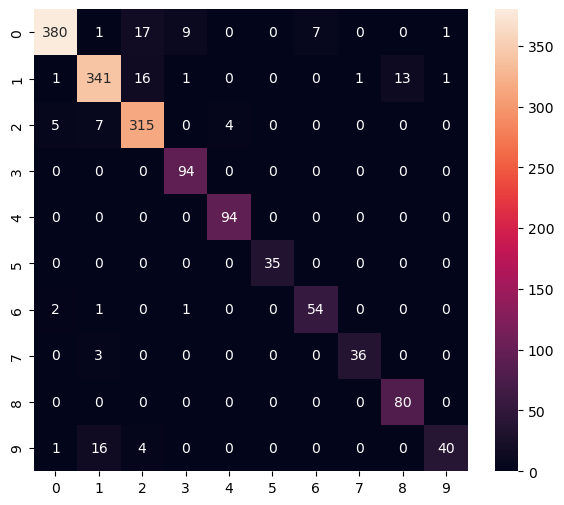

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       415
           1       0.92      0.91      0.92       374
           2       0.89      0.95      0.92       331
           3       0.90      1.00      0.94        94
           4       0.96      1.00      0.98        94
           5       1.00      1.00      1.00        35
           6       0.89      0.93      0.91        58
           7       0.97      0.92      0.95        39
           8       0.86      1.00      0.92        80
           9       0.95      0.66      0.78        61

    accuracy                           0.93      1581
   macro avg       0.93      0.93      0.93      1581
weighted avg       0.93      0.93      0.93      1581



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /tmp/tmpu251d0mw/assets


INFO:tensorflow:Assets written to: /tmp/tmpu251d0mw/assets


Saved artifact at '/tmp/tmpu251d0mw'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  140606360323472: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140606360325200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140606360324240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140606360327120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140606360326928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140606360327888: TensorSpec(shape=(), dtype=tf.resource, name=None)


2025-04-04 09:12:58.729262: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmpu251d0mw
2025-04-04 09:12:58.729768: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-04-04 09:12:58.729777: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /tmp/tmpu251d0mw
2025-04-04 09:12:58.768655: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-04-04 09:12:58.788805: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /tmp/tmpu251d0mw
2025-04-04 09:12:58.795180: I tensorflow/cc/saved_model/loader.cc:466] SavedModel load for tags { serve }; Status: success: OK. Took 65919 microseconds.
2025-04-04 09:12:58.804280: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.


6820

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 69 μs, sys: 70 μs, total: 139 μs
Wall time: 138 μs


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[2.3876889e-02 3.7957955e-02 8.5985750e-01 7.2913547e-04 2.1001854e-09
 1.0430751e-06 1.8374692e-03 7.2562262e-02 1.7806221e-03 1.3971624e-03]
2
